In [2]:
!pip install statsmodels

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from collections import Counter

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from math import sqrt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.anova import anova_lm
import sklearn.metrics

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [4]:
weather = pd.read_csv('weather.csv')
weather.shape

(142193, 24)

In [5]:
weather.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No


In [6]:
weather.tail(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [7]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [8]:
darwinww = weather[weather.Location == 'Darwin']
darwinw = darwinww.dropna()
darwinw = darwinw.drop(columns="Date")
darwinw.shape

(3062, 23)

In [9]:
darwinw.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
135921,Darwin,20.0,33.1,0.0,4.4,11.0,E,41.0,ENE,SSE,...,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,No,0.0,No
135922,Darwin,19.4,32.4,0.0,6.0,10.4,ENE,50.0,SE,E,...,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,No,0.0,No


In [10]:
darwinw.tail(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
139111,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,0.0,No
139112,Darwin,20.2,31.7,0.0,5.6,10.7,ENE,30.0,ENE,NNW,...,32.0,1013.9,1009.7,6.0,5.0,25.4,31.0,No,0.0,No


In [11]:
darwinw.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000
mean,23.166492,32.559536,4.038210,6.318746,8.596571,40.429784,15.134226,20.847485,68.111039,51.338668,1011.984095,1008.425114,4.277923,4.264206,27.170967,31.110320,4.746048
std,2.986763,1.720600,11.166785,1.855733,3.120268,9.694524,6.689497,5.970902,14.977848,18.505584,3.301699,2.871811,2.548740,2.575058,2.734737,2.057691,15.602276
min,12.500000,21.900000,0.000000,0.200000,0.000000,15.000000,2.000000,4.000000,11.000000,5.000000,998.800000,996.000000,0.000000,0.000000,16.700000,19.000000,0.000000
25%,21.500000,31.600000,0.000000,5.200000,7.200000,33.000000,11.000000,17.000000,62.000000,39.000000,1009.800000,1006.500000,2.000000,2.000000,25.500000,30.000000,0.000000
50%,23.900000,32.800000,0.000000,6.400000,10.000000,39.000000,15.000000,20.000000,70.500000,52.000000,1012.300000,1008.700000,5.000000,5.000000,27.800000,31.500000,0.000000
75%,25.275000,33.700000,1.400000,7.600000,10.900000,46.000000,19.000000,24.000000,78.000000,63.000000,1014.400000,1010.600000,7.000000,7.000000,29.300000,32.600000,1.400000
max,29.700000,38.000000,132.600000,16.800000,12.300000,102.000000,50.000000,52.000000,99.000000,99.000000,1019.300000,1015.400000,8.000000,8.000000,32.200000,37.400000,367.600000


# Data Exploration

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


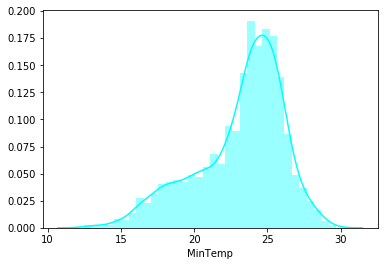

In [12]:
sns.distplot( darwinw["MinTemp"] , color="cyan", label="MinTemp")

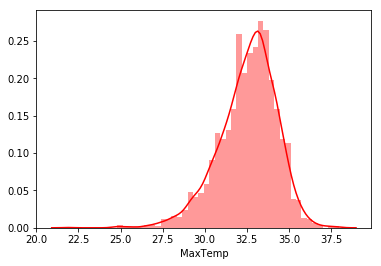

In [13]:
sns.distplot( darwinw["MaxTemp"] , color="red", label="MaxTemp")

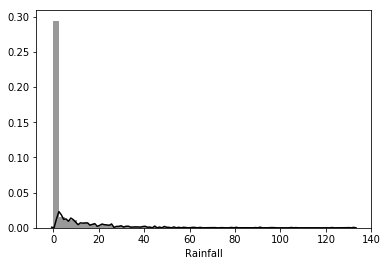

In [14]:
sns.distplot( darwinw["Rainfall"] , color="black", label="rainfall")

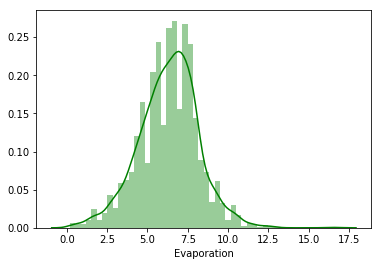

In [15]:
sns.distplot( darwinw["Evaporation"] , color="green", label="Evaporation")

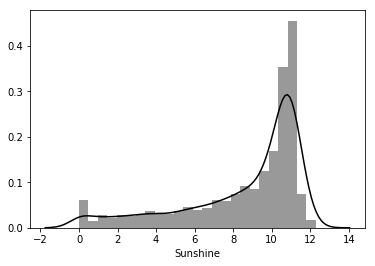

In [16]:
sns.distplot( darwinw["Sunshine"] , color="black", label="Sunshine")

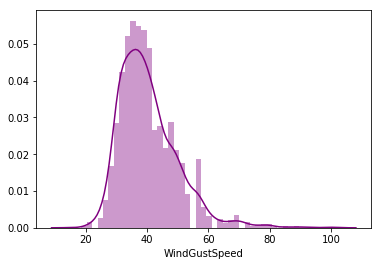

In [17]:
sns.distplot( darwinw["WindGustSpeed"] , color="purple", label="WindGustSpeed")

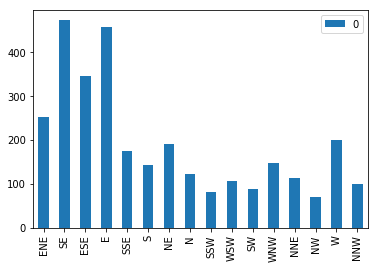

In [18]:
Position = darwinw.WindDir9am
windcounter = Counter(Position)
count = pd.DataFrame.from_dict(windcounter, orient='index')
count.plot(kind='bar')

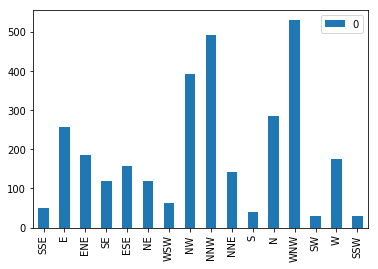

In [19]:
Position = darwinw.WindDir3pm
windcounter = Counter(Position)
count = pd.DataFrame.from_dict(windcounter, orient='index')
count.plot(kind='bar')

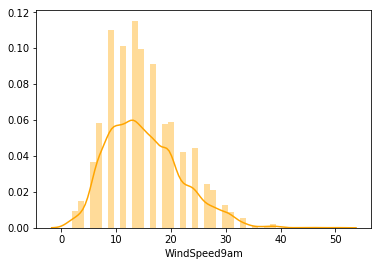

In [20]:
sns.distplot( darwinw["WindSpeed9am"] , color="orange", label="WindSpeed9am")

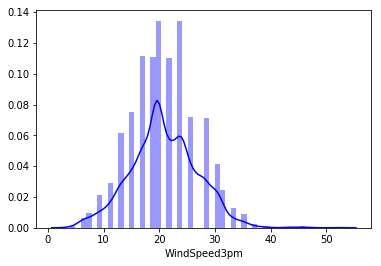

In [21]:
sns.distplot( darwinw["WindSpeed3pm"] , color="blue", label="WindSpeed3pm")

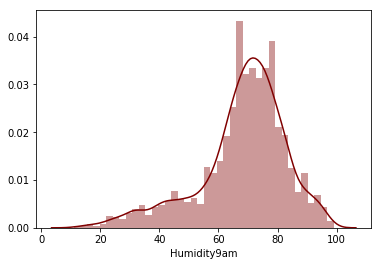

In [22]:
sns.distplot( darwinw["Humidity9am"] , color="maroon", label="Humidity9am")

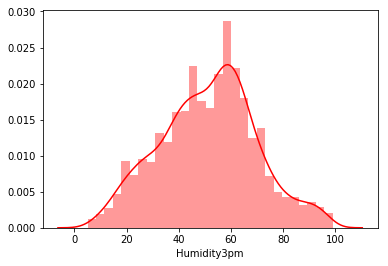

In [23]:
sns.distplot( darwinw["Humidity3pm"] , color="red", label="Humidity3pm")

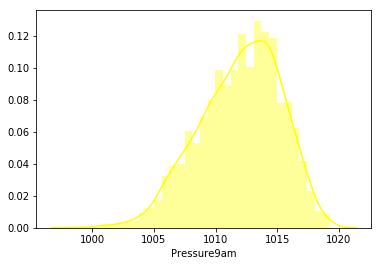

In [24]:
sns.distplot( darwinw["Pressure9am"] , color="yellow", label="Pressure9am")

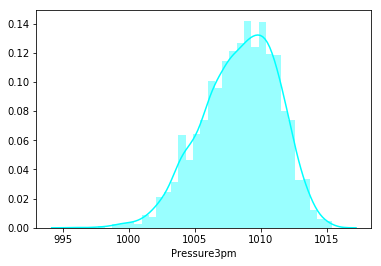

In [25]:
sns.distplot( darwinw["Pressure3pm"] , color="cyan", label="Pressure3pm")

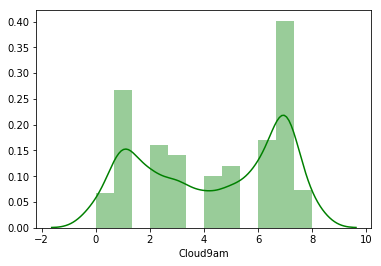

In [26]:
sns.distplot( darwinw["Cloud9am"] , color="green", label="Cloud9am")

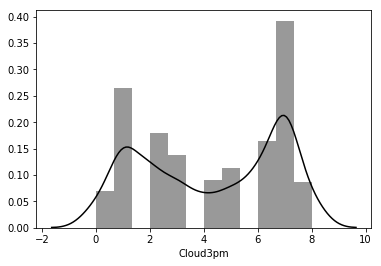

In [27]:
sns.distplot( darwinw["Cloud3pm"] , color="black", label="Cloud3pm")

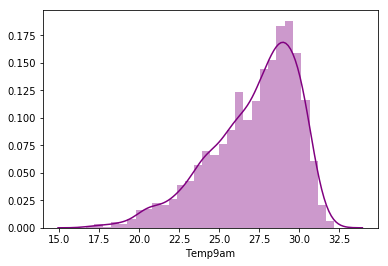

In [28]:
sns.distplot( darwinw["Temp9am"] , color="purple", label="Temp9am")

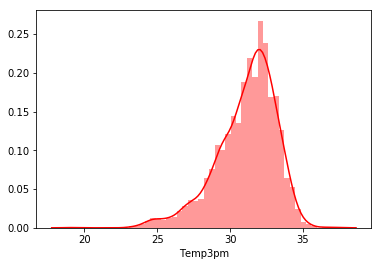

In [29]:
sns.distplot( darwinw["Temp3pm"] , color="red", label="Temp3pm")

## Linear Regression

In [30]:
y = pd.DataFrame(data=darwinw, columns=['Rainfall'])
y.describe()

,Rainfall
count,3062.000000
mean,4.038210
std,11.166785
min,0.000000
25%,0.000000
50%,0.000000
75%,1.400000
max,132.600000


## Data Drops for Splits & HeatMap

In [31]:
nsdarwin = darwinw.drop(columns="Location")
nsdarwin1 = nsdarwin.drop(columns="WindGustDir")
nsdarwin2 = nsdarwin1.drop(columns="WindDir9am")
nsdarwin3 = nsdarwin2.drop(columns="WindDir3pm")
nsdarwin4 = nsdarwin3.drop(columns="RainToday")
nsdarwin5 = nsdarwin4.drop(columns="RainTomorrow")

nsdarwin5.to_csv("CleanData.csv")

darwinnorf = nsdarwin5.drop(columns="Rainfall")

# HeatMap

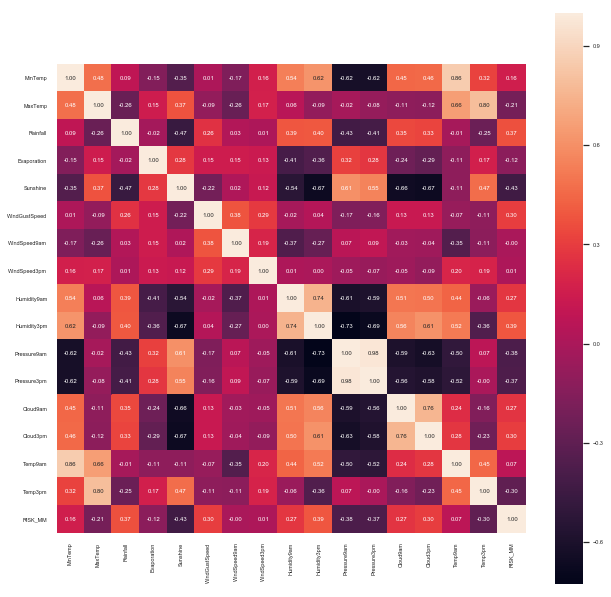

In [32]:
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set(rc={"figure.figsize":(10.5,10.5)})

cols = list(nsdarwin5)
cm = np.corrcoef(nsdarwin5.values.T)
sns.set(font_scale=.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", yticklabels=cols, xticklabels=cols)

# Multiple Linear Regression

In [33]:
X_train, X_test, y_train, y_test = train_test_split(darwinnorf, y, test_size=0.20, random_state=42)

multiple_model = sm.OLS(y_train ,X_train)

multiple_result = multiple_model.fit()

print(multiple_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     144.4
Date:                Tue, 12 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:21:05   Log-Likelihood:                -8812.2
No. Observations:                2449   AIC:                         1.766e+04
Df Residuals:                    2433   BIC:                         1.775e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MinTemp          -1.4467      0.157     -9.234

## Data Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(nsdarwin5, y, test_size=0.20, random_state=42)

X_train.shape

(2449, 17)

In [35]:
X_test.shape

(613, 17)

### WindSpeed9AM & WindSpeed3PM

In [36]:
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['WindSpeed9am','WindSpeed3pm']])

simple_result = simple_model.fit()

print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     154.2
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           8.42e-64
Time:                        22:21:05   Log-Likelihood:                -9484.4
No. Observations:                2449   AIC:                         1.897e+04
Df Residuals:                    2447   BIC:                         1.898e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
WindSpeed9am     0.1046      0.033      3.202   

#### Plots

In [37]:
X_test = sm.add_constant(X_test)
y_pred_simple = simple_result.predict(X_test[['WindSpeed9am','WindSpeed3pm']])

Text(0.5, 1.0, 'Regression plot')

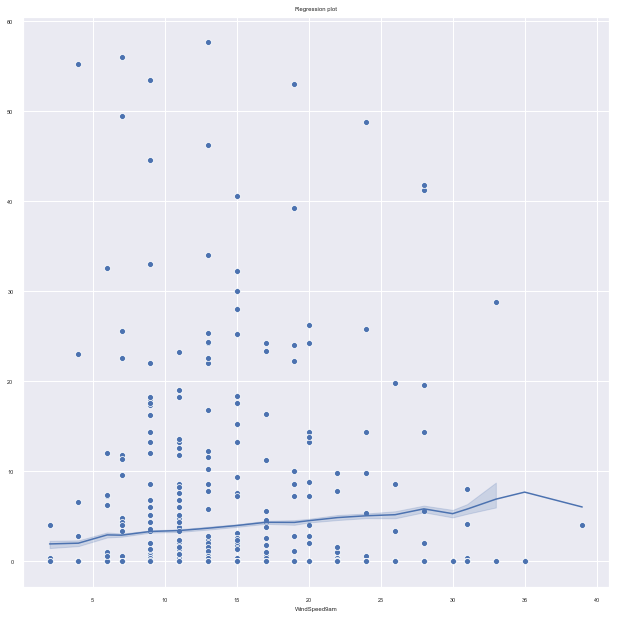

In [38]:
sns.scatterplot(x = X_test['WindSpeed9am'], y = y_test.values.ravel())
sns.lineplot(x = X_test['WindSpeed9am'] , y = y_pred_simple)
plt.title('Regression plot')

Text(0.5, 1.0, 'Regression plot')

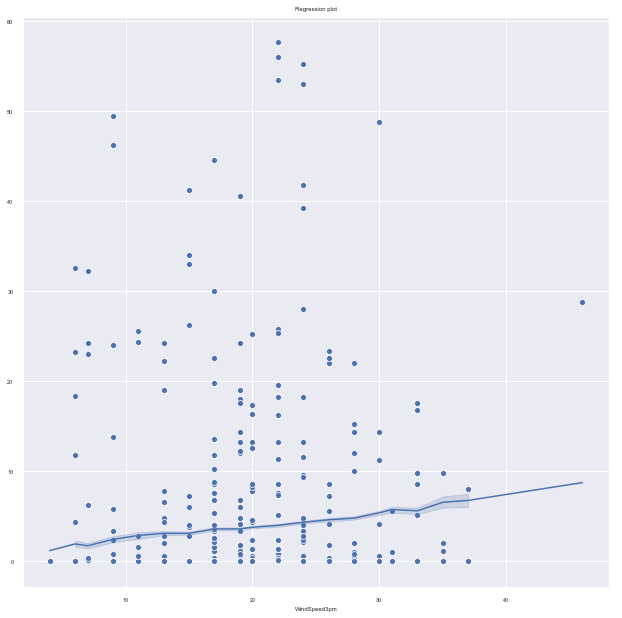

In [39]:
sns.scatterplot(x = X_test['WindSpeed3pm'], y = y_test.values.ravel())
sns.lineplot(x = X_test['WindSpeed3pm'] , y = y_pred_simple)
plt.title('Regression plot')

Text(0.5, 1.0, 'Residual plot')

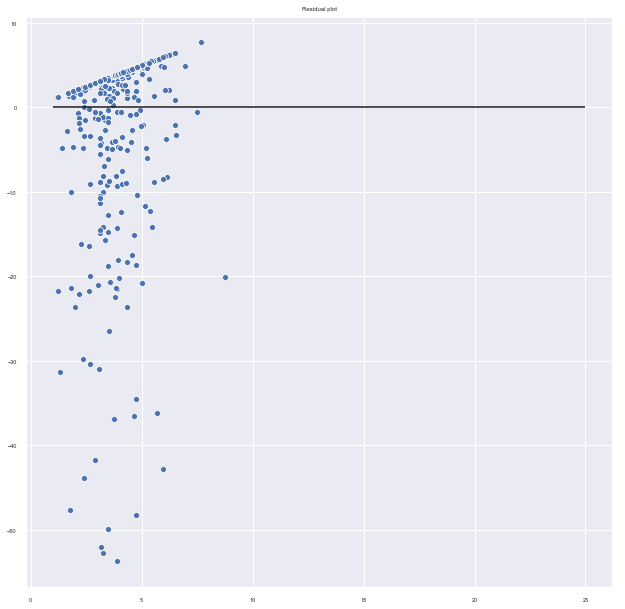

In [40]:
sns.scatterplot(x = y_pred_simple, y = (y_pred_simple- y_test.values.ravel()))
plt.hlines(y=0, xmin=1, xmax=25)
plt.title('Residual plot')

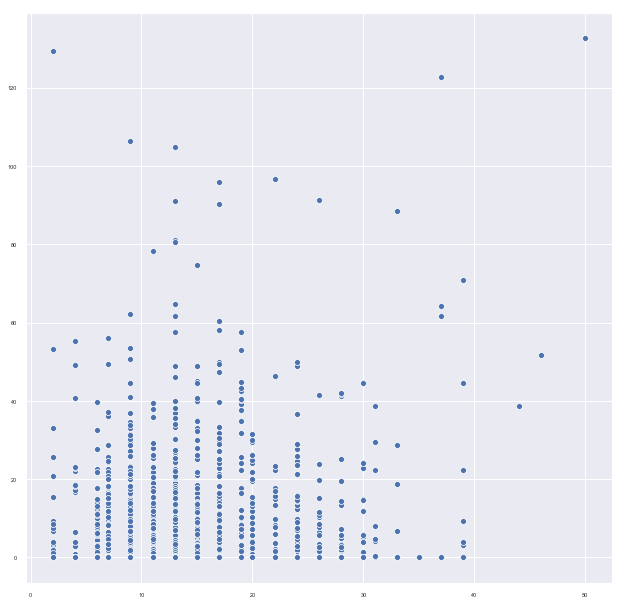

In [41]:
sns.scatterplot(x=darwinw['WindSpeed9am'].values, y=y.values.ravel(), )

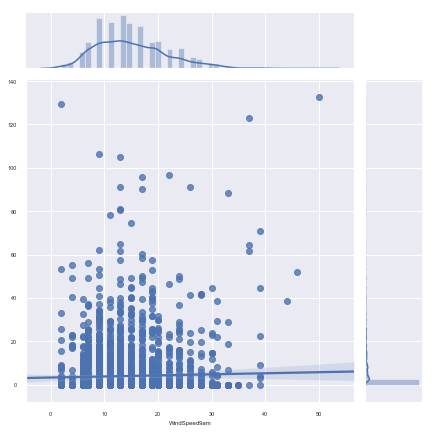

In [42]:
sns.jointplot(x=darwinw['WindSpeed9am'], y=y.values.ravel(), kind='reg')

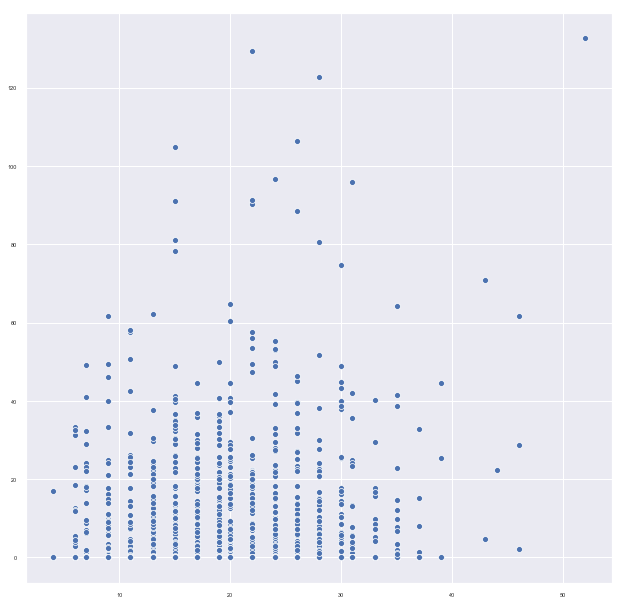

In [43]:
sns.scatterplot(x=darwinw['WindSpeed3pm'].values, y=y.values.ravel(), )

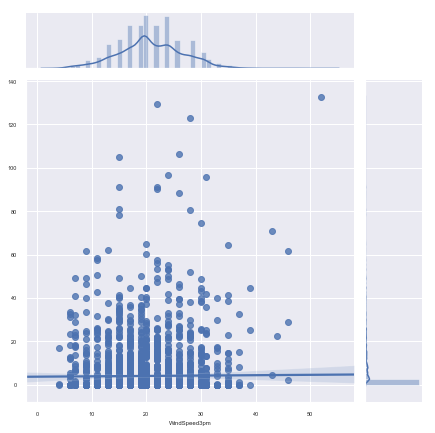

In [44]:
sns.jointplot(x=darwinw['WindSpeed3pm'], y=y.values.ravel(), kind='reg')

## Humidity9AM & Humidity3PM

In [45]:
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['Humidity9am','Humidity3pm']])

simple_result = simple_model.fit()

print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     319.1
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          7.18e-124
Time:                        22:21:08   Log-Likelihood:                -9346.0
No. Observations:                2449   AIC:                         1.870e+04
Df Residuals:                    2447   BIC:                         1.871e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Humidity9am    -0.0754      0.014     -5.500      

#### Plots

In [46]:
X_test = sm.add_constant(X_test)
y_pred_simple = simple_result.predict(X_test[['Humidity9am','Humidity3pm']])

Text(0.5, 1.0, 'Regression plot')

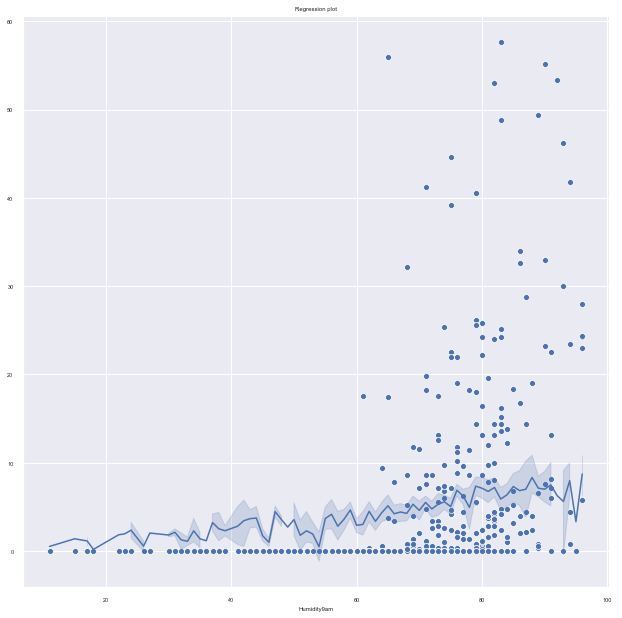

In [47]:
sns.scatterplot(x = X_test['Humidity9am'], y = y_test.values.ravel())
sns.lineplot(x = X_test['Humidity9am'] , y = y_pred_simple)
plt.title('Regression plot')

Text(0.5, 1.0, 'Regression plot')

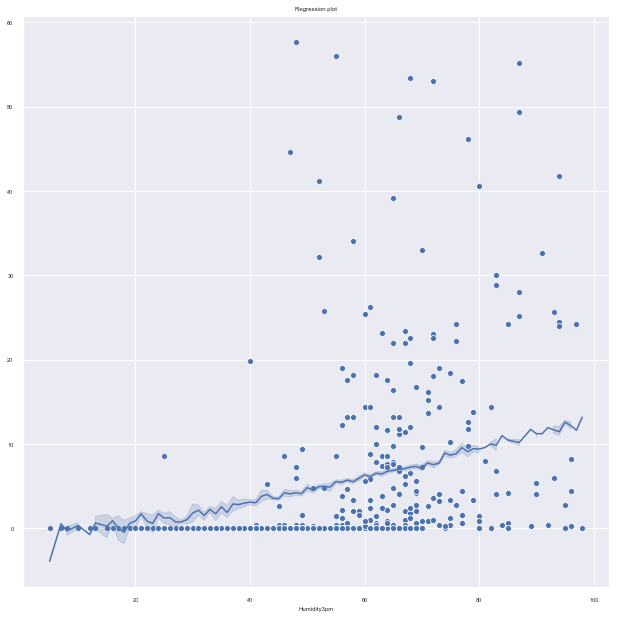

In [48]:
sns.scatterplot(x = X_test['Humidity3pm'], y = y_test.values.ravel())
sns.lineplot(x = X_test['Humidity3pm'] , y = y_pred_simple)
plt.title('Regression plot')

Text(0.5, 1.0, 'Residual plot')

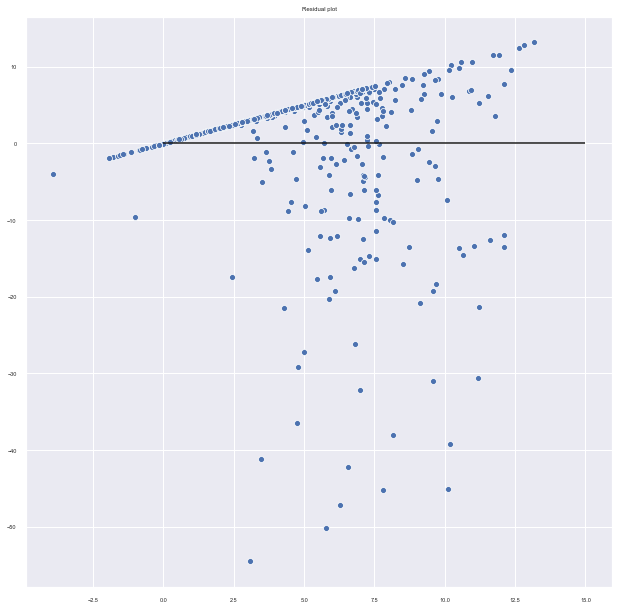

In [49]:
sns.scatterplot(x = y_pred_simple, y = (y_pred_simple- y_test.values.ravel()))
plt.hlines(y=0, xmin=0, xmax=15)
plt.title('Residual plot')

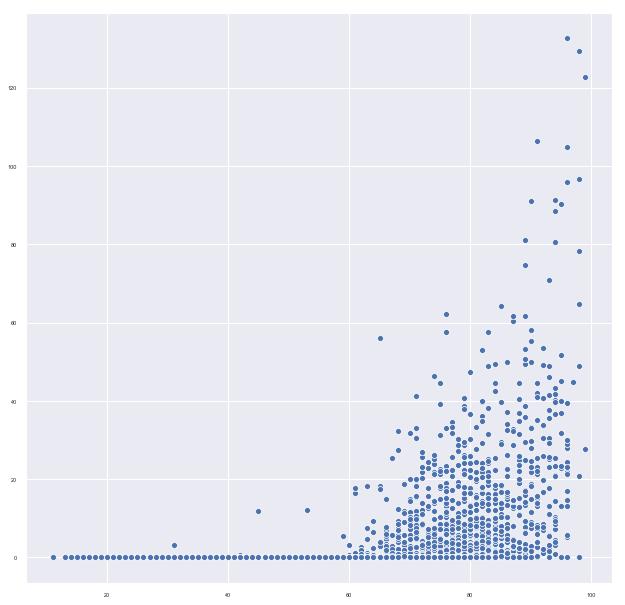

In [50]:
sns.scatterplot(x=darwinw['Humidity9am'].values, y=y.values.ravel(), )

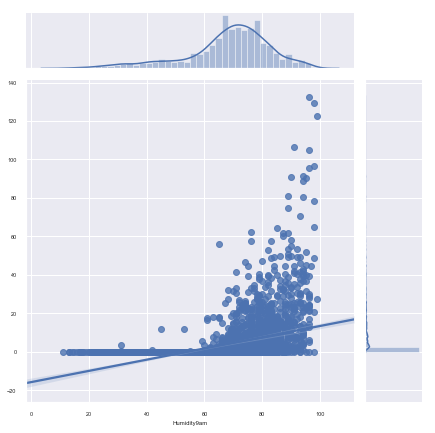

In [51]:
sns.jointplot(x=darwinw['Humidity9am'], y=y.values.ravel(), kind='reg')

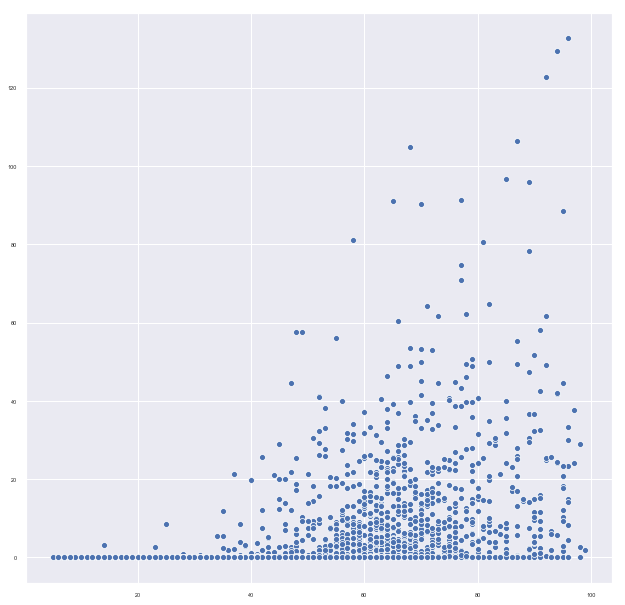

In [52]:
sns.scatterplot(x=darwinw['Humidity3pm'].values, y=y.values.ravel(), )

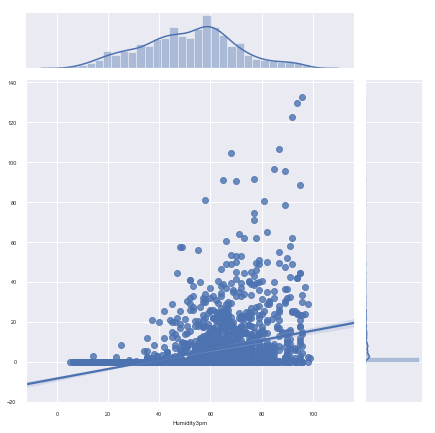

In [53]:
sns.jointplot(x=darwinw['Humidity3pm'], y=y.values.ravel(), kind='reg')

## Cloud9AM & Cloud3PM

In [54]:
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['Cloud9am','Cloud3pm']])

simple_result = simple_model.fit()

print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     327.1
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          1.29e-126
Time:                        22:21:12   Log-Likelihood:                -9339.6
No. Observations:                2449   AIC:                         1.868e+04
Df Residuals:                    2447   BIC:                         1.869e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cloud9am       0.7454      0.126      5.901      0.0

In [55]:
X_test = sm.add_constant(X_test)
y_pred_simple = simple_result.predict(X_test[['Cloud9am','Cloud3pm']])

#### Plots

Text(0.5, 1.0, 'Regression plot')

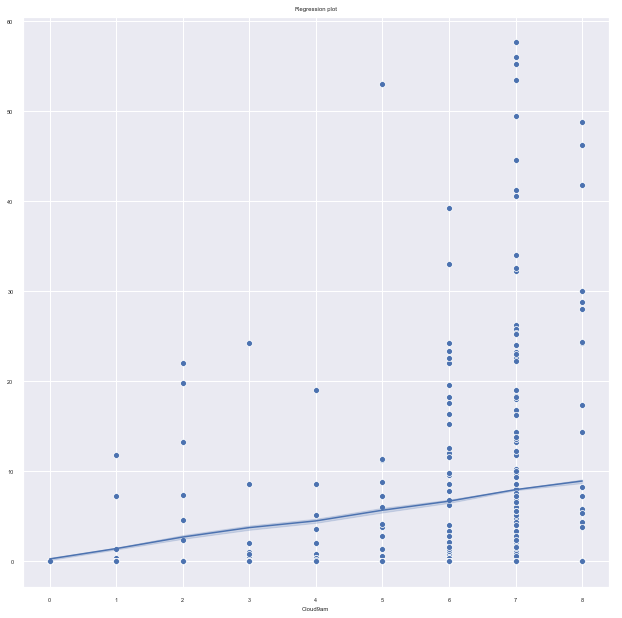

In [56]:
sns.scatterplot(x = X_test['Cloud9am'], y = y_test.values.ravel())
sns.lineplot(x = X_test['Cloud9am'] , y = y_pred_simple)
plt.title('Regression plot')

Text(0.5, 1.0, 'Regression plot')

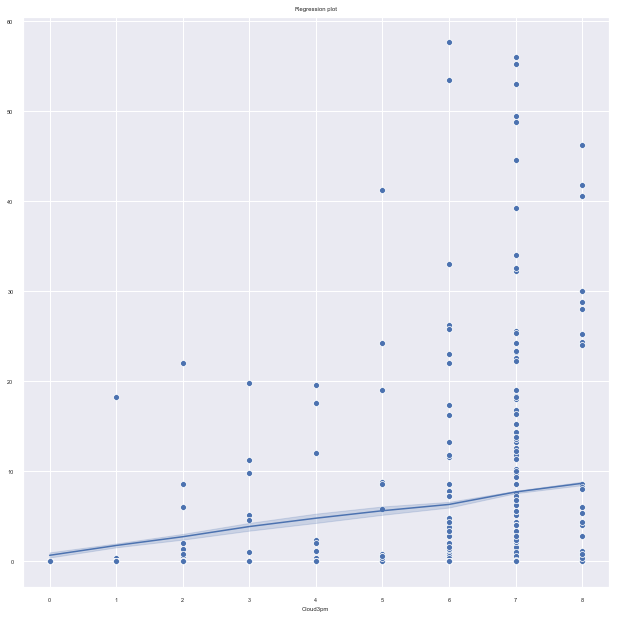

In [57]:
sns.scatterplot(x = X_test['Cloud3pm'], y = y_test.values.ravel())
sns.lineplot(x = X_test['Cloud3pm'] , y = y_pred_simple)
plt.title('Regression plot')

Text(0.5, 1.0, 'Residual plot')

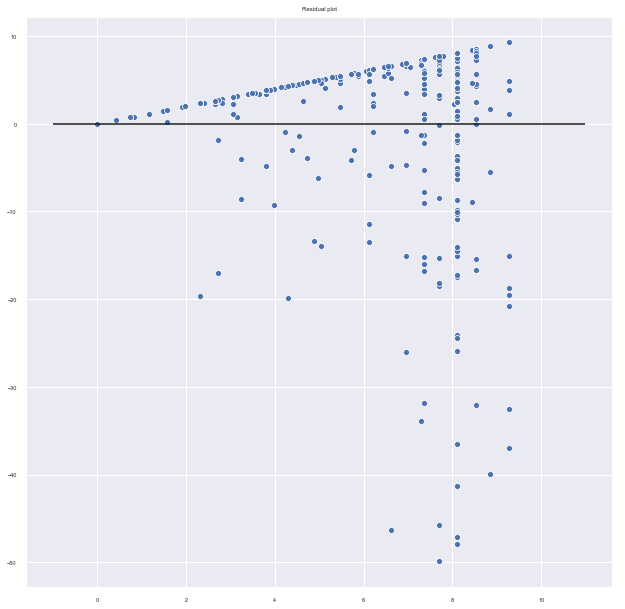

In [58]:
sns.scatterplot(x = y_pred_simple, y = (y_pred_simple- y_test.values.ravel()))
plt.hlines(y=0, xmin=-1, xmax=11)
plt.title('Residual plot')

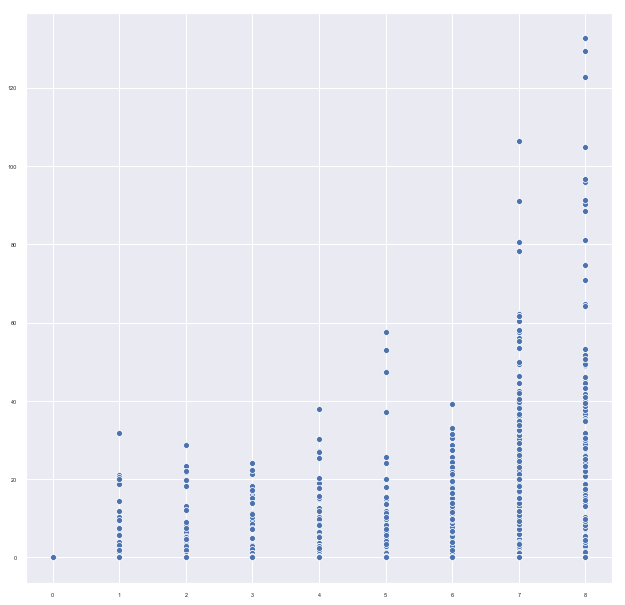

In [59]:
sns.scatterplot(x=darwinw['Cloud9am'].values, y=y.values.ravel(), )

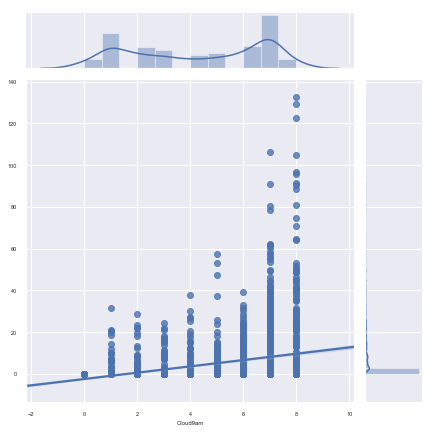

In [60]:
sns.jointplot(x=darwinw['Cloud9am'], y=y.values.ravel(), kind='reg')

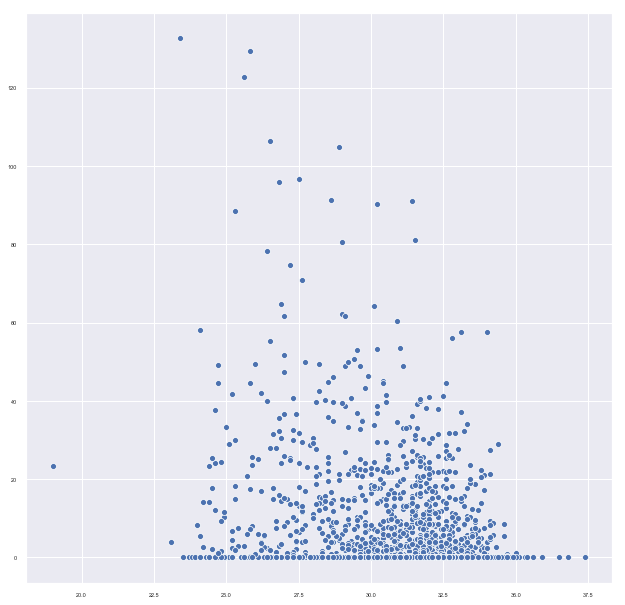

In [61]:
sns.scatterplot(x=darwinw['Temp3pm'].values, y=y.values.ravel(), )

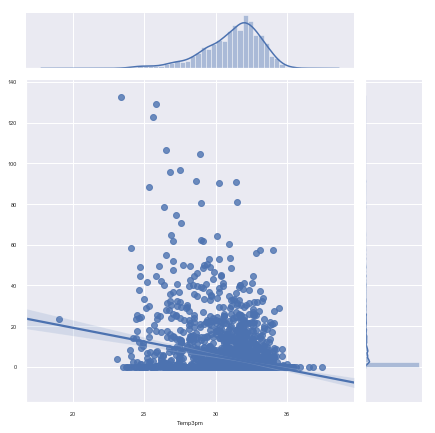

In [62]:
sns.jointplot(x=darwinw['Temp3pm'], y=y.values.ravel(), kind='reg')

## WindGustSpeed & Pressure9AM

In [63]:
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['WindGustSpeed','Pressure9am']])

simple_result = simple_model.fit()

print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     266.1
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          2.80e-105
Time:                        22:21:16   Log-Likelihood:                -9388.8
No. Observations:                2449   AIC:                         1.878e+04
Df Residuals:                    2447   BIC:                         1.879e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
WindGustSpeed     0.3245      0.023     14.122

In [64]:
X_test = sm.add_constant(X_test)
y_pred_simple = simple_result.predict(X_test[['WindGustSpeed','Pressure9am']])

Text(0.5, 1.0, 'Regression plot')

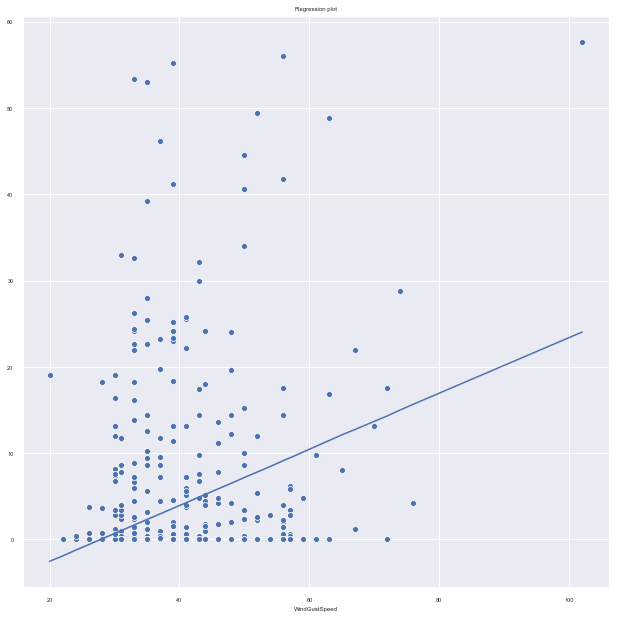

In [65]:
sns.scatterplot(x = X_test['WindGustSpeed'], y = y_test.values.ravel())
sns.lineplot(x = X_test['WindGustSpeed'] , y = y_pred_simple)
plt.title('Regression plot')

Text(0.5, 1.0, 'Regression plot')

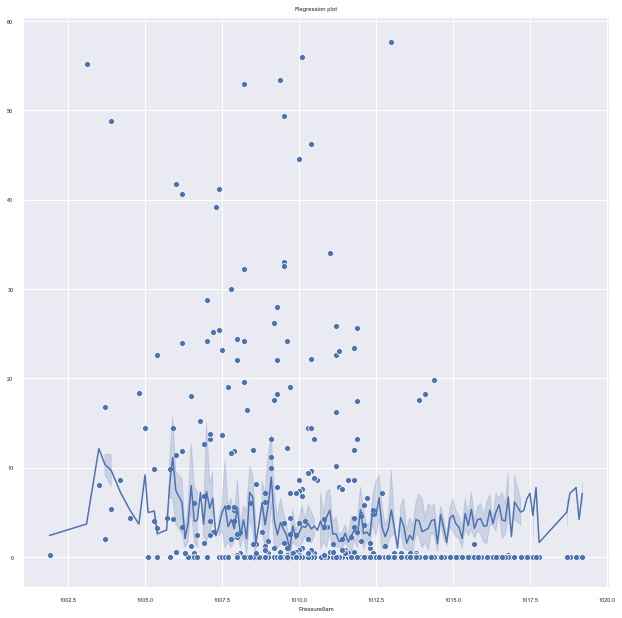

In [66]:
sns.scatterplot(x = X_test['Pressure9am'], y = y_test.values.ravel())
sns.lineplot(x = X_test['Pressure9am'] , y = y_pred_simple)
plt.title('Regression plot')

Text(0.5, 1.0, 'Residual plot')

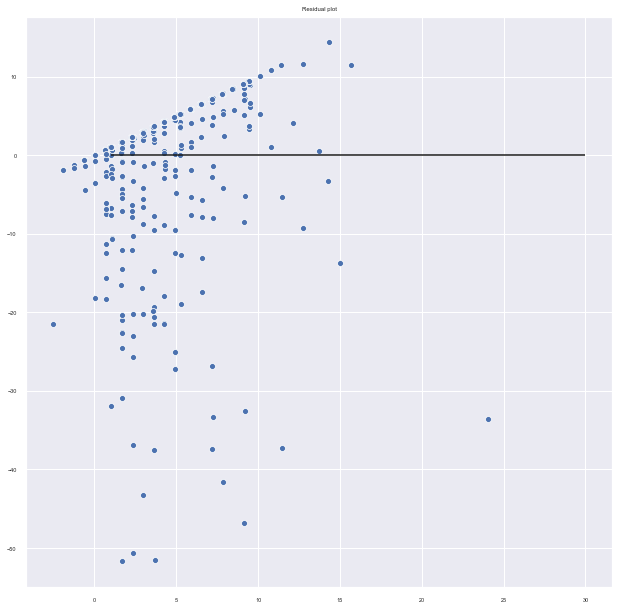

In [67]:
sns.scatterplot(x = y_pred_simple, y = (y_pred_simple- y_test.values.ravel()))
plt.hlines(y=0, xmin=1, xmax=30)
plt.title('Residual plot')

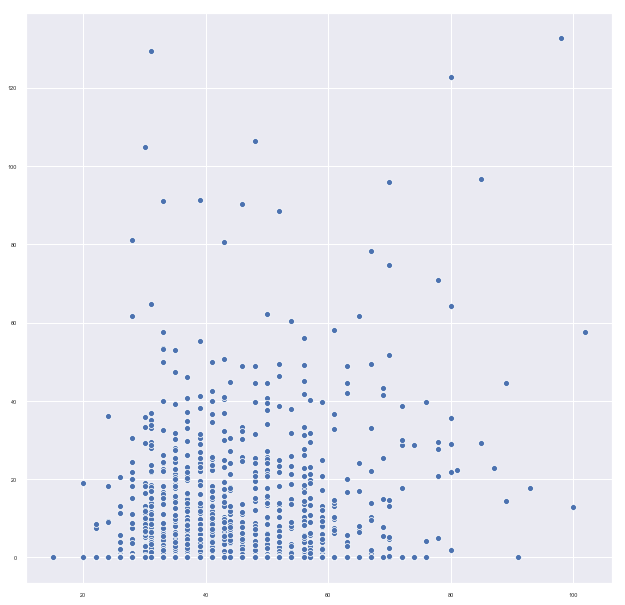

In [68]:
sns.scatterplot(x=darwinw['WindGustSpeed'].values, y=y.values.ravel(), )

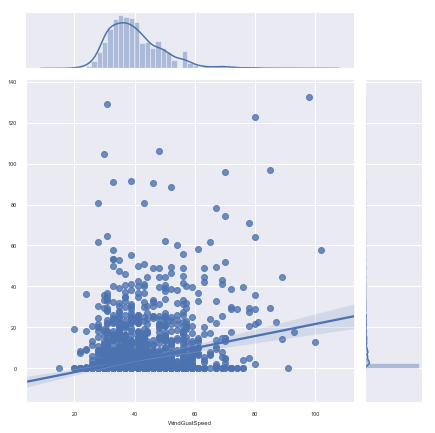

In [69]:
sns.jointplot(x=darwinw['WindGustSpeed'], y=y.values.ravel(), kind='reg')

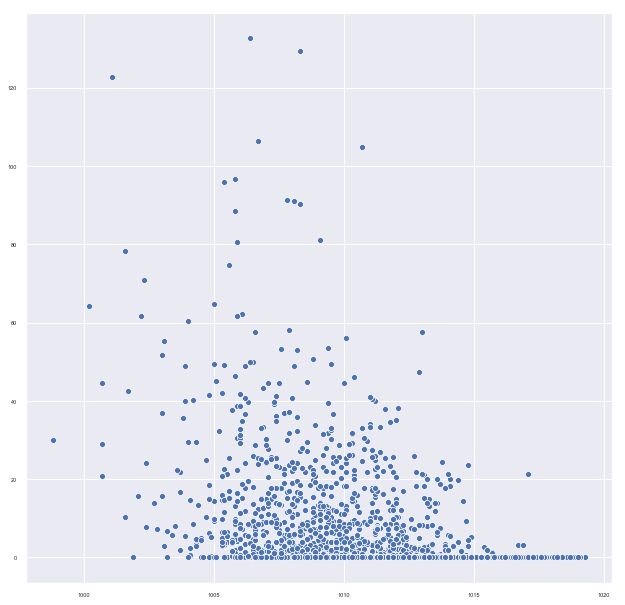

In [70]:
sns.scatterplot(x=darwinw['Pressure9am'].values, y=y.values.ravel(), )

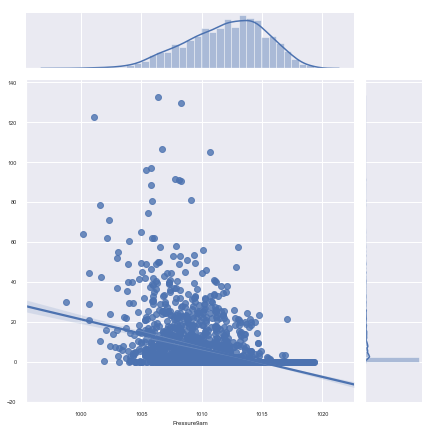

In [71]:
sns.jointplot(x=darwinw['Pressure9am'], y=y.values.ravel(), kind='reg')

# Polynomial Regressions

#### WindGustSpeed

In [72]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train['WindGustSpeed']))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test['WindGustSpeed']))
poly_result = poly_reg.fit(X_poly_train, y_train)

In [73]:
poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


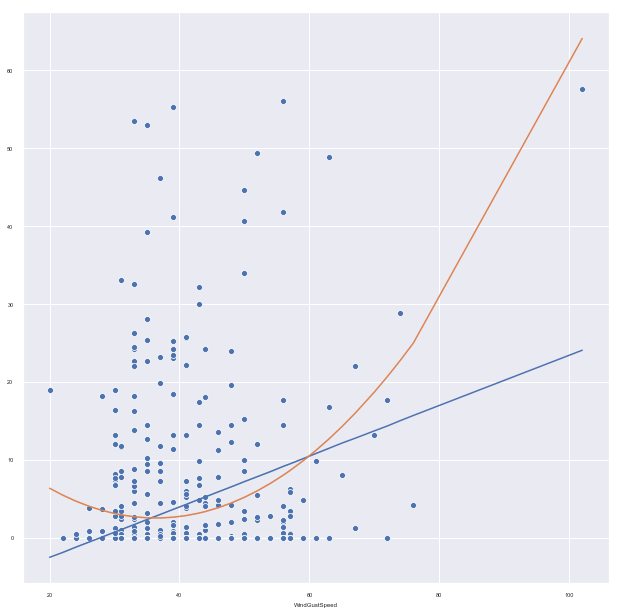

In [74]:
# Plot to compare models
sns.scatterplot(x = X_test['WindGustSpeed'], y = y_test.values.ravel())
sns.lineplot(x = X_test['WindGustSpeed'] , y = y_pred_simple)
sns.lineplot(x = X_test['WindGustSpeed'] , y = y_poly_pred.ravel())

In [75]:
# Retrain to be able to print summary table
poly_model = sm.OLS(y_train,X_poly_train)
poly_result = poly_model.fit()

print(poly_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     169.6
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           1.05e-69
Time:                        22:21:21   Log-Likelihood:                -9324.5
No. Observations:                2449   AIC:                         1.865e+04
Df Residuals:                    2446   BIC:                         1.867e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.3866      2.743      7.798      0.0

In [76]:
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['WindGustSpeed']])

simple_result = simple_model.fit()

print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     427.9
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           9.73e-88
Time:                        22:21:21   Log-Likelihood:                -9432.5
No. Observations:                2449   AIC:                         1.887e+04
Df Residuals:                    2448   BIC:                         1.887e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
WindGustSpeed     0.1140      0.006     20.685

#### Anova

In [77]:
anovaResults = anova_lm(simple_result, poly_result)
print(anovaResults)

   df_resid            ssr  df_diff       ss_diff           F        Pr(>F)
0    2448.0  317648.588713      0.0           NaN         NaN           NaN
1    2446.0  290829.130386      2.0  26819.458327  112.781679  1.406248e-47


C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


#### Pressure9AM

In [78]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train['Pressure9am']))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test['Pressure9am']))
poly_result = poly_reg.fit(X_poly_train, y_train)

In [79]:
poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


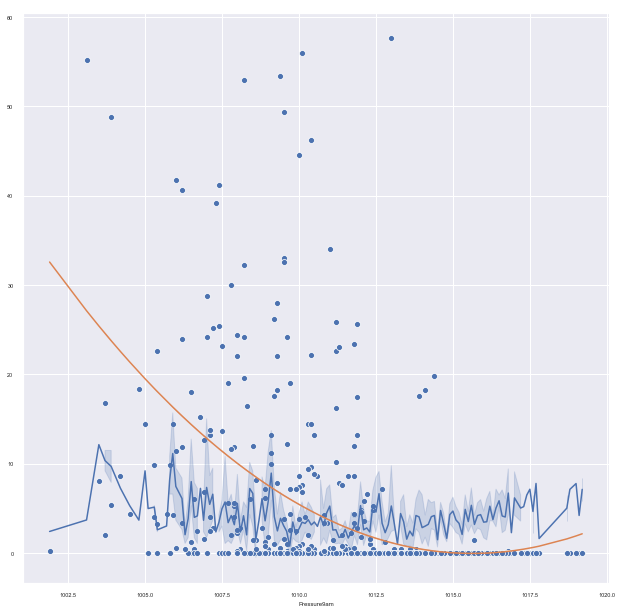

In [80]:
# Plot to compare models
sns.scatterplot(x = X_test['Pressure9am'], y = y_test.values.ravel())
sns.lineplot(x = X_test['Pressure9am'] , y = y_pred_simple)
sns.lineplot(x = X_test['Pressure9am'] , y = y_poly_pred.ravel())

In [81]:
poly_model = sm.OLS(y_train,X_poly_train)
poly_result = poly_model.fit()

print(poly_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     372.3
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          7.06e-142
Time:                        22:21:25   Log-Likelihood:                -9158.1
No. Observations:                2449   AIC:                         1.832e+04
Df Residuals:                    2446   BIC:                         1.834e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.784e+05   1.47e+04     12.126      0.0

In [82]:
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['Pressure9am']])

simple_result = simple_model.fit()

print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     307.7
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           5.42e-65
Time:                        22:21:25   Log-Likelihood:                -9484.8
No. Observations:                2449   AIC:                         1.897e+04
Df Residuals:                    2448   BIC:                         1.898e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Pressure9am     0.0041      0.000     17.543      

#### Anova

In [83]:
anovaResults = anova_lm(simple_result, poly_result)
print(anovaResults)

   df_resid            ssr  df_diff       ss_diff           F         Pr(>F)
0    2448.0  331496.805156      0.0           NaN         NaN            NaN
1    2446.0  253878.670437      2.0  77618.134718  373.906869  2.049367e-142


C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


#### WindSpeed9AM

In [84]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train['WindSpeed9am']))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test['WindSpeed9am']))
poly_result = poly_reg.fit(X_poly_train, y_train)

In [85]:
poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


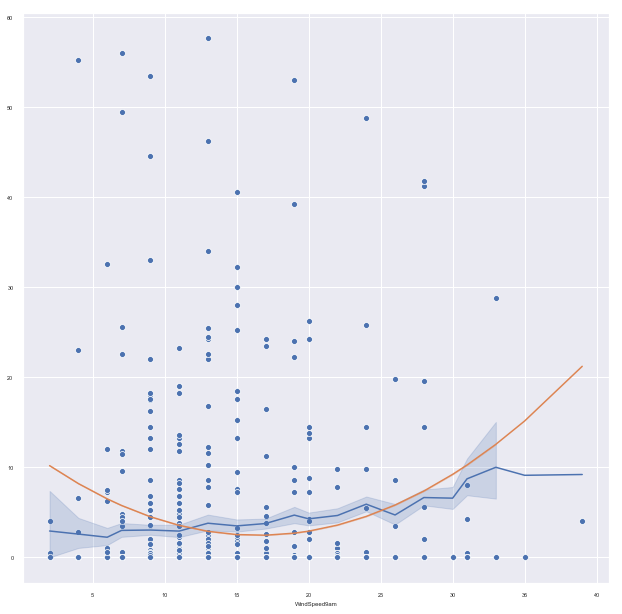

In [86]:
sns.scatterplot(x = X_test['WindSpeed9am'], y = y_test.values.ravel())
sns.lineplot(x = X_test['WindSpeed9am'] , y = y_pred_simple)
sns.lineplot(x = X_test['WindSpeed9am'] , y = y_poly_pred.ravel())

In [87]:
poly_model = sm.OLS(y_train,X_poly_train)
poly_result = poly_model.fit()

print(poly_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     56.87
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           7.24e-25
Time:                        22:21:25   Log-Likelihood:                -9427.9
No. Observations:                2449   AIC:                         1.886e+04
Df Residuals:                    2446   BIC:                         1.888e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4377      1.064     11.692      0.0

In [88]:
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['WindSpeed9am']])

simple_result = simple_model.fit()

print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     284.8
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           1.54e-60
Time:                        22:21:26   Log-Likelihood:                -9495.0
No. Observations:                2449   AIC:                         1.899e+04
Df Residuals:                    2448   BIC:                         1.900e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
WindSpeed9am     0.2402      0.014     16.877   

#### Anova

In [89]:
anovaResults = anova_lm(simple_result, poly_result)
print(anovaResults)

   df_resid            ssr  df_diff       ss_diff          F        Pr(>F)
0    2448.0  334276.776761      0.0           NaN        NaN           NaN
1    2446.0  316447.203071      2.0  17829.573691  68.907446  7.701105e-30


C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


#### WindSpeed3PM

In [90]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train['WindSpeed3pm']))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test['WindSpeed3pm']))
poly_result = poly_reg.fit(X_poly_train, y_train)

In [91]:
poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


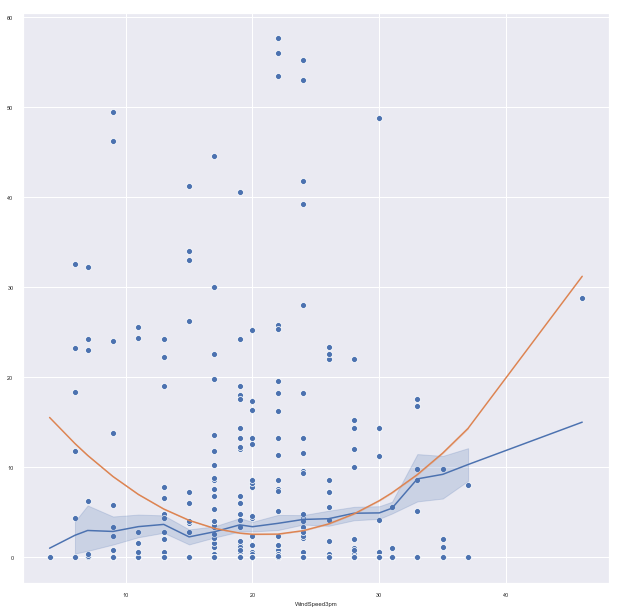

In [92]:
sns.scatterplot(x = X_test['WindSpeed3pm'], y = y_test.values.ravel())
sns.lineplot(x = X_test['WindSpeed3pm'] , y = y_pred_simple)
sns.lineplot(x = X_test['WindSpeed3pm'] , y = y_poly_pred.ravel())

In [93]:
poly_model = sm.OLS(y_train,X_poly_train)
poly_result = poly_model.fit()

print(poly_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     60.45
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           2.37e-26
Time:                        22:21:26   Log-Likelihood:                -9424.4
No. Observations:                2449   AIC:                         1.885e+04
Df Residuals:                    2446   BIC:                         1.887e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4107      1.951     11.484      0.0

In [94]:
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['WindSpeed3pm']])

simple_result = simple_model.fit()

print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     297.0
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           6.48e-63
Time:                        22:21:26   Log-Likelihood:                -9489.5
No. Observations:                2449   AIC:                         1.898e+04
Df Residuals:                    2448   BIC:                         1.899e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
WindSpeed3pm     0.1870      0.011     17.235   

#### Anova

In [95]:
anovaResults = anova_lm(simple_result, poly_result)
print(anovaResults)

   df_resid            ssr  df_diff       ss_diff          F        Pr(>F)
0    2448.0  332790.755929      0.0           NaN        NaN           NaN
1    2446.0  315564.022341      2.0  17226.733588  66.763933  5.868783e-29


C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


#### Humidity9AM

In [96]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train['Humidity9am']))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test['Humidity9am']))
poly_result = poly_reg.fit(X_poly_train, y_train)

In [97]:
poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


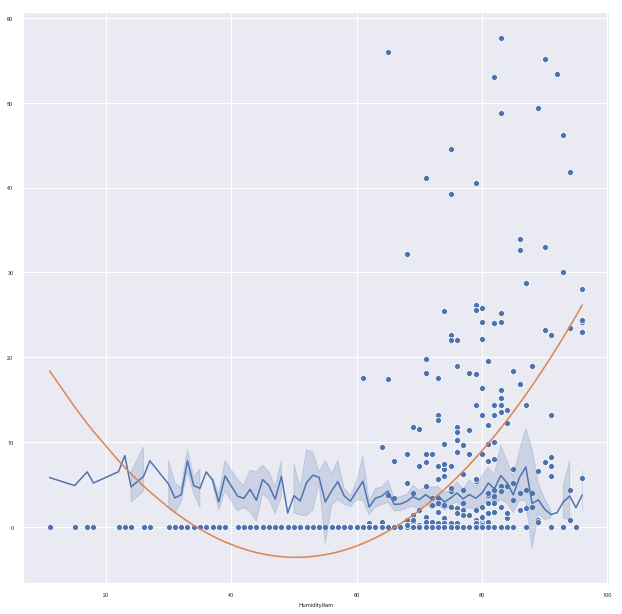

In [98]:
sns.scatterplot(x = X_test['Humidity9am'], y = y_test.values.ravel())
sns.lineplot(x = X_test['Humidity9am'] , y = y_pred_simple)
sns.lineplot(x = X_test['Humidity9am'] , y = y_poly_pred.ravel())

In [99]:
poly_model = sm.OLS(y_train,X_poly_train)
poly_result = poly_model.fit()

print(poly_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     580.6
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          4.48e-207
Time:                        22:21:28   Log-Likelihood:                -9007.8
No. Observations:                2449   AIC:                         1.802e+04
Df Residuals:                    2446   BIC:                         1.804e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.4304      2.240     14.477      0.0

In [100]:
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['Humidity9am']])

simple_result = simple_model.fit()

print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     491.1
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           2.59e-99
Time:                        22:21:29   Log-Likelihood:                -9405.9
No. Observations:                2449   AIC:                         1.881e+04
Df Residuals:                    2448   BIC:                         1.882e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Humidity9am     0.0723      0.003     22.160      

#### Anova

In [101]:
anovaResults = anova_lm(simple_result, poly_result)
print(anovaResults)

   df_resid            ssr  df_diff       ss_diff           F         Pr(>F)
0    2448.0  310821.421361      0.0           NaN         NaN            NaN
1    2446.0  224552.037736      2.0  86269.383625  469.857487  2.088379e-173


C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


#### Humidity3PM

In [102]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train['Humidity3pm']))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test['Humidity3pm']))
poly_result = poly_reg.fit(X_poly_train, y_train)

In [103]:
poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


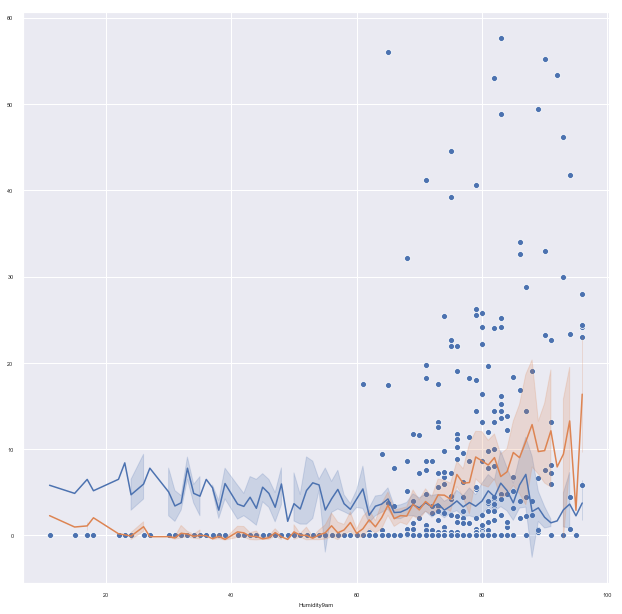

In [104]:
sns.scatterplot(x = X_test['Humidity9am'], y = y_test.values.ravel())
sns.lineplot(x = X_test['Humidity9am'] , y = y_pred_simple)
sns.lineplot(x = X_test['Humidity9am'] , y = y_poly_pred.ravel())

In [105]:
poly_model = sm.OLS(y_train,X_poly_train)
poly_result = poly_model.fit()

print(poly_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     319.0
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          7.99e-124
Time:                        22:21:31   Log-Likelihood:                -9199.7
No. Observations:                2449   AIC:                         1.841e+04
Df Residuals:                    2446   BIC:                         1.842e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3421      1.245      3.488      0.0

In [106]:
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['Humidity3pm']])

simple_result = simple_model.fit()

print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     600.8
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          7.89e-119
Time:                        22:21:31   Log-Likelihood:                -9361.0
No. Observations:                2449   AIC:                         1.872e+04
Df Residuals:                    2448   BIC:                         1.873e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Humidity3pm     0.1005      0.004     24.510      

#### Anova

In [107]:
anovaResults = anova_lm(simple_result, poly_result)
print(anovaResults)

   df_resid            ssr  df_diff       ss_diff           F        Pr(>F)
0    2448.0  299636.941668      0.0           NaN         NaN           NaN
1    2446.0  262656.491374      2.0  36980.450293  172.191026  1.085359e-70


C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


#### Cloud9AM

In [108]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train['Cloud9am']))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test['Cloud9am']))
poly_result = poly_reg.fit(X_poly_train, y_train)

In [109]:
poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


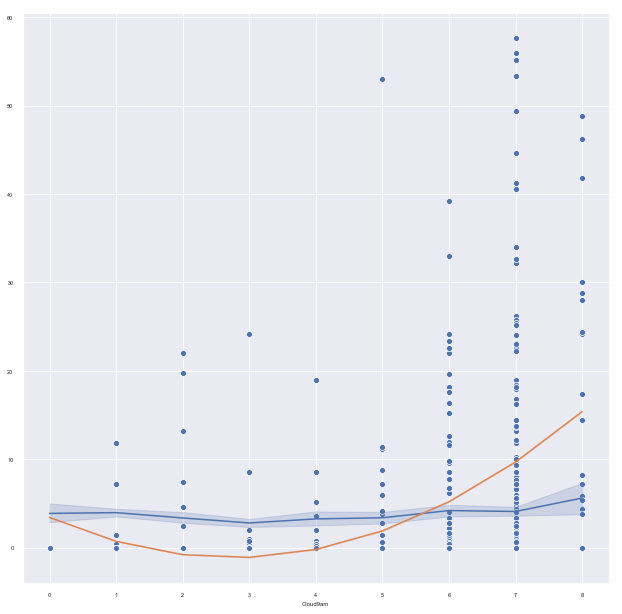

In [110]:
sns.scatterplot(x = X_test['Cloud9am'], y = y_test.values.ravel())
sns.lineplot(x = X_test['Cloud9am'] , y = y_pred_simple)
sns.lineplot(x = X_test['Cloud9am'] , y = y_poly_pred.ravel())

In [111]:
poly_model = sm.OLS(y_train,X_poly_train)
poly_result = poly_model.fit()

print(poly_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     261.5
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          1.23e-103
Time:                        22:21:32   Log-Likelihood:                -9246.3
No. Observations:                2449   AIC:                         1.850e+04
Df Residuals:                    2446   BIC:                         1.852e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4175      0.624      5.476      0.0

In [112]:
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['Cloud9am']])

simple_result = simple_model.fit()

print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     640.9
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          8.43e-126
Time:                        22:21:32   Log-Likelihood:                -9345.0
No. Observations:                2449   AIC:                         1.869e+04
Df Residuals:                    2448   BIC:                         1.870e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cloud9am       1.1318      0.045     25.317      0.0

In [113]:
anovaResults = anova_lm(simple_result, poly_result)
print(anovaResults)

   df_resid            ssr  df_diff       ss_diff           F        Pr(>F)
0    2448.0  295739.248235      0.0           NaN         NaN           NaN
1    2446.0  272831.756172      2.0  22907.492063  102.685491  1.505989e-43


C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


###### Cloud 3 PM

In [114]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train['Cloud3pm']))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test['Cloud3pm']))
poly_result = poly_reg.fit(X_poly_train, y_train)

In [115]:
poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


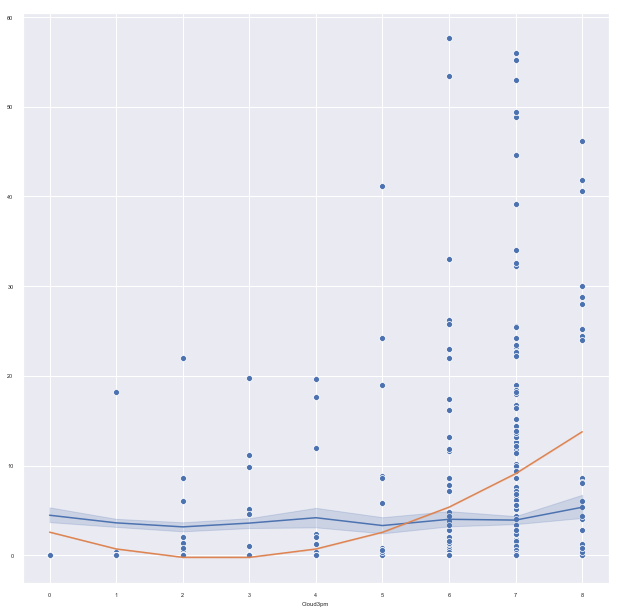

In [116]:
sns.scatterplot(x = X_test['Cloud3pm'], y = y_test.values.ravel())
sns.lineplot(x = X_test['Cloud3pm'] , y = y_pred_simple)
sns.lineplot(x = X_test['Cloud3pm'] , y = y_poly_pred.ravel())

In [117]:
poly_model = sm.OLS(y_train,X_poly_train)
poly_result = poly_model.fit()

print(poly_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     201.6
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           8.72e-82
Time:                        22:21:32   Log-Likelihood:                -9296.6
No. Observations:                2449   AIC:                         1.860e+04
Df Residuals:                    2446   BIC:                         1.862e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5739      0.637      4.042      0.0

#### Anova

In [118]:
anovaResults = anova_lm(simple_result, poly_result)
print(anovaResults)

   df_resid            ssr  df_diff       ss_diff          F        Pr(>F)
0    2448.0  295739.248235      0.0           NaN        NaN           NaN
1    2446.0  284289.602273      2.0  11449.645961  49.255818  1.066620e-21


C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


#### Temp3PM

In [119]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train['Temp3pm']))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test['Temp3pm']))
poly_result = poly_reg.fit(X_poly_train, y_train)

In [120]:
poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


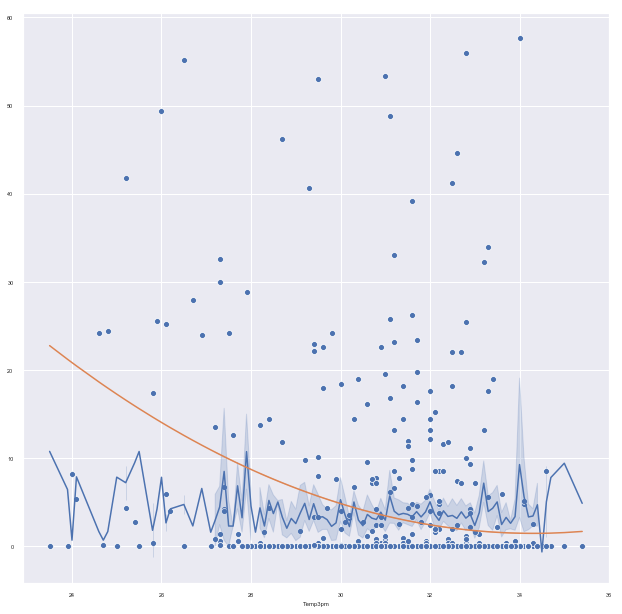

In [121]:
sns.scatterplot(x = X_test['Temp3pm'], y = y_test.values.ravel())
sns.lineplot(x = X_test['Temp3pm'] , y = y_pred_simple)
sns.lineplot(x = X_test['Temp3pm'] , y = y_poly_pred.ravel())

In [122]:
poly_model = sm.OLS(y_train,X_poly_train)
poly_result = poly_model.fit()

print(poly_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     109.6
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           2.69e-46
Time:                        22:21:35   Log-Likelihood:                -9378.5
No. Observations:                2449   AIC:                         1.876e+04
Df Residuals:                    2446   BIC:                         1.878e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        215.9989     31.042      6.958      0.0

In [123]:
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['Temp3pm']])

simple_result = simple_model.fit()

print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     275.5
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           1.02e-58
Time:                        22:21:36   Log-Likelihood:                -9499.2
No. Observations:                2449   AIC:                         1.900e+04
Df Residuals:                    2448   BIC:                         1.901e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Temp3pm        0.1260      0.008     16.599      0.0

#### Anova

In [124]:
anovaResults = anova_lm(simple_result, poly_result)
print(anovaResults)

   df_resid            ssr  df_diff       ss_diff           F        Pr(>F)
0    2448.0  335420.560052      0.0           NaN         NaN           NaN
1    2446.0  303934.099146      2.0  31486.460906  126.698326  4.396038e-53


C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# Penalty Functions

In [125]:
y = pd.DataFrame(darwinw['Rainfall'])

In [126]:
#Select Relevant Variables
x = darwinnorf[['WindGustSpeed', 'Pressure9am', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']]

In [127]:
x.head()

,WindGustSpeed,Pressure9am,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm
135921,41.0,1016.0,13.0,17.0,81.0,32.0,1.0,2.0
135922,50.0,1016.8,15.0,28.0,81.0,17.0,1.0,1.0
135923,46.0,1017.2,22.0,19.0,38.0,24.0,0.0,1.0
135924,44.0,1017.3,22.0,13.0,55.0,16.0,2.0,6.0
135925,46.0,1016.3,20.0,19.0,37.0,16.0,1.0,1.0


In [128]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=50)

In [129]:
X_train.head()

,WindGustSpeed,Pressure9am,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm
138972,44.0,1004.5,9.0,6.0,87.0,96.0,8.0,8.0
138993,26.0,1011.7,2.0,9.0,82.0,66.0,6.0,6.0
136186,33.0,1011.0,17.0,24.0,75.0,63.0,7.0,7.0
138543,37.0,1012.7,19.0,11.0,68.0,48.0,6.0,2.0
135995,31.0,1014.3,15.0,17.0,72.0,43.0,2.0,1.0


In [130]:
X_test.head()

,WindGustSpeed,Pressure9am,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm
136570,26.0,1010.1,9.0,13.0,80.0,76.0,4.0,6.0
136163,33.0,1008.7,9.0,20.0,82.0,89.0,7.0,7.0
139093,43.0,1014.5,20.0,24.0,66.0,32.0,3.0,3.0
137042,37.0,1016.1,13.0,19.0,60.0,33.0,1.0,3.0
137921,33.0,1009.9,15.0,20.0,70.0,68.0,6.0,6.0


In [131]:
X_train.reset_index(inplace=True)
X_test.reset_index(inplace=True)
y_train.reset_index(inplace=True)
y_test.reset_index(inplace=True)

In [132]:
X_train.head()

,index,WindGustSpeed,Pressure9am,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm
0,138972,44.0,1004.5,9.0,6.0,87.0,96.0,8.0,8.0
1,138993,26.0,1011.7,2.0,9.0,82.0,66.0,6.0,6.0
2,136186,33.0,1011.0,17.0,24.0,75.0,63.0,7.0,7.0
3,138543,37.0,1012.7,19.0,11.0,68.0,48.0,6.0,2.0
4,135995,31.0,1014.3,15.0,17.0,72.0,43.0,2.0,1.0


In [133]:
X_test.head()

,index,WindGustSpeed,Pressure9am,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm
0,136570,26.0,1010.1,9.0,13.0,80.0,76.0,4.0,6.0
1,136163,33.0,1008.7,9.0,20.0,82.0,89.0,7.0,7.0
2,139093,43.0,1014.5,20.0,24.0,66.0,32.0,3.0,3.0
3,137042,37.0,1016.1,13.0,19.0,60.0,33.0,1.0,3.0
4,137921,33.0,1009.9,15.0,20.0,70.0,68.0,6.0,6.0


In [134]:
from sklearn.preprocessing import LabelBinarizer
WindGustSpeed_lb = LabelBinarizer()

# Train
WindGustSpeed_dummies_df = WindGustSpeed_lb.fit_transform(X_train['WindGustSpeed'].values)

# Test
WindGustSpeed_dummies_test_df = WindGustSpeed_lb.fit_transform(X_test['WindGustSpeed'].values)

In [135]:
WindGustSpeed_dummies_df = pd.DataFrame(WindGustSpeed_dummies_df, columns = ["WindGustSpeed"+str(int(i)) for i in range(WindGustSpeed_dummies_df.shape[1])])
X_train_final = pd.concat([X_train, WindGustSpeed_dummies_df], axis=1)

#Test
WindGustSpeed_dummies_test_df = pd.DataFrame(WindGustSpeed_dummies_test_df, columns = ["WindGustSpeed"+str(int(i)) for i in range(WindGustSpeed_dummies_test_df.shape[1])])
X_test_final = pd.concat([X_test, WindGustSpeed_dummies_test_df], axis=1)

In [136]:
X_test_final.head()

,index,WindGustSpeed,Pressure9am,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,WindGustSpeed0,...,WindGustSpeed28,WindGustSpeed29,WindGustSpeed30,WindGustSpeed31,WindGustSpeed32,WindGustSpeed33,WindGustSpeed34,WindGustSpeed35,WindGustSpeed36,WindGustSpeed37
0,136570,26.0,1010.1,9.0,13.0,80.0,76.0,4.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0
1,136163,33.0,1008.7,9.0,20.0,82.0,89.0,7.0,7.0,0,...,0,0,0,0,0,0,0,0,0,0
2,139093,43.0,1014.5,20.0,24.0,66.0,32.0,3.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
3,137042,37.0,1016.1,13.0,19.0,60.0,33.0,1.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
4,137921,33.0,1009.9,15.0,20.0,70.0,68.0,6.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
X_train_final.head()

,index,WindGustSpeed,Pressure9am,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,WindGustSpeed0,...,WindGustSpeed28,WindGustSpeed29,WindGustSpeed30,WindGustSpeed31,WindGustSpeed32,WindGustSpeed33,WindGustSpeed34,WindGustSpeed35,WindGustSpeed36,WindGustSpeed37
0,138972,44.0,1004.5,9.0,6.0,87.0,96.0,8.0,8.0,0,...,0,0,0,0,0,0,0,0,0,0
1,138993,26.0,1011.7,2.0,9.0,82.0,66.0,6.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0
2,136186,33.0,1011.0,17.0,24.0,75.0,63.0,7.0,7.0,0,...,0,0,0,0,0,0,0,0,0,0
3,138543,37.0,1012.7,19.0,11.0,68.0,48.0,6.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
4,135995,31.0,1014.3,15.0,17.0,72.0,43.0,2.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
#Train
X_train_final.drop('index', axis=1, inplace=True)
X_train_final.drop('WindGustSpeed', axis=1, inplace=True)
y_train.drop('index', axis=1, inplace=True)

# Test
X_test_final.drop('index', axis=1, inplace=True)
X_test_final.drop('WindGustSpeed', axis=1, inplace=True)
y_test.drop('index', axis=1, inplace=True)

C:\Anaconda\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Linear regression with lasso - sklearn

In [139]:
lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train)
lr_pred = lr_model.predict(X_test_final)
print(lr_model.score(X_test_final, y_test))
lr_model.coef_

0.29045093557649304


array([[ -0.5285354 ,   0.07935665,  -0.08246849,   0.14073291,
          0.05355747,   0.29525372,  -0.06030808,  -3.54888349,
         -8.29141629,  -8.89451365,  -8.38742368,  -5.87444385,
         -8.49105033,  -6.61656638,  -7.23065063,  -6.71513599,
         -7.44615025,  -6.97193209,  -5.80484734,  -5.4587497 ,
         -6.16603196,  -5.98637652,  -3.97367231,  -4.08666225,
         -3.22494599,  -6.30727469,  -0.26026036,  -4.1671086 ,
         -7.34678277,  -5.72323914,  12.71361439,   8.73234215,
          0.58526756,  -1.60006581,  -5.92997194,   1.13630874,
         11.8101845 ,   4.23024629, -14.36430077,  17.96748058,
          4.92202843,  46.10066584,   7.17233842,  -2.5033871 ,
         46.00136697]])

In [140]:
# Lasso regression model with no penalty (OLS)
lasso_model_0 = Lasso(alpha=0, fit_intercept=True)
lasso_model_0.fit(X_train_final, y_train)
print(lasso_model_0.score(X_test_final, y_test))
lasso_model_0.coef_

0.2904509355764936


C:\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([-0.5285354 ,  0.07935665, -0.08246849,  0.14073291,  0.05355747,
        0.29525372, -0.06030808,  1.28309184, -3.45944096, -4.06253832,
       -3.55544835, -1.04246852, -3.659075  , -1.78459105, -2.3986753 ,
       -1.88316066, -2.61417492, -2.13995676, -0.97287201, -0.62677437,
       -1.33405663, -1.15440119,  0.85830302,  0.74531308,  1.60702934,
       -1.47529936,  4.57171497,  0.66486673, -2.51480744, -0.89126381,
       17.54558972, 13.56431748,  5.41724289,  3.23190952, -1.09799661,
        5.96828407, 16.64215983,  9.06222162, -9.53232544, 22.79945591,
        9.75400376, 50.93264117, 12.00431375,  2.32858823, 50.8333423 ])

In [141]:
# Lasso regression model with alpha = 10 (some penalty)
lasso_model_10 = Lasso(alpha=10, fit_intercept=True)
lasso_model_10.fit(X_train_final, y_train)
print(lasso_model_10.score(X_test_final, y_test))
lasso_model_10.coef_

0.1738465763442282


array([-0.        ,  0.        ,  0.        ,  0.12036473,  0.12504675,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [142]:
# Lasso regression model with alpha = 10000 (high penalty)
lasso_model_10k = Lasso(alpha=10000, fit_intercept=True)
lasso_model_10k.fit(X_train_final, y_train)
lasso_10k_pred = lasso_model_10k.predict(X_test_final)
print(lasso_model_10k.score(X_test_final, y_test))
lasso_model_10k.coef_

-0.00012764175028356917


array([-0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
       -0., -0., -0., -0., -0., -0.,  0., -0., -0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


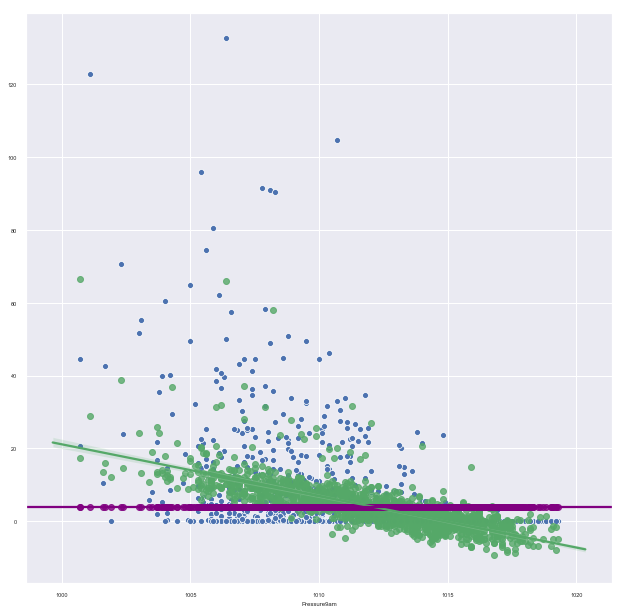

In [143]:
sns.scatterplot(x = X_test_final['Pressure9am'], y = y_test.values.ravel())
sns.regplot(x = X_test_final['Pressure9am'], y = lr_pred.ravel(), color='g')
sns.regplot(x = X_test_final['Pressure9am'], y = lasso_10k_pred.ravel(), color='purple')

# Ridge regression - sklearn

In [144]:
# Ridge regression with high penalty
ridge_model = Ridge(alpha=10000, fit_intercept=True)
ridge_model.fit(X_train_final, y_train)
ridge_pred = ridge_model.predict(X_test_final)
print(ridge_model.score(X_test_final, y_test))
ridge_model.coef_

0.2348200247782215


array([[-2.89999137e-01,  1.66806134e-01, -2.85921257e-02,
         1.63389721e-01,  8.47944080e-02,  1.80897746e-01,
         8.75530995e-02,  4.99887586e-04, -1.24742249e-03,
        -2.15956733e-03, -4.28170362e-03,  1.75535066e-03,
        -1.68890910e-02, -4.63135567e-03, -1.76457471e-02,
        -1.23298784e-02, -2.33116485e-02, -1.62717072e-02,
         9.41244471e-05,  2.25237848e-03, -3.18279106e-03,
        -2.01615899e-03,  1.25824031e-02,  7.55120515e-03,
         1.37835324e-02, -2.10204248e-03,  1.86643417e-02,
         2.79607618e-03, -2.59573795e-03,  6.73773697e-06,
         7.21012905e-03,  4.28499704e-03,  4.59627320e-03,
         1.66105986e-03, -1.56363597e-04,  3.56300399e-03,
         1.44196124e-03,  1.84836127e-03, -9.29543630e-04,
         7.05051143e-03,  8.48449490e-04,  1.03741835e-02,
         1.31901597e-03,  4.08458627e-04,  5.15831696e-03]])

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


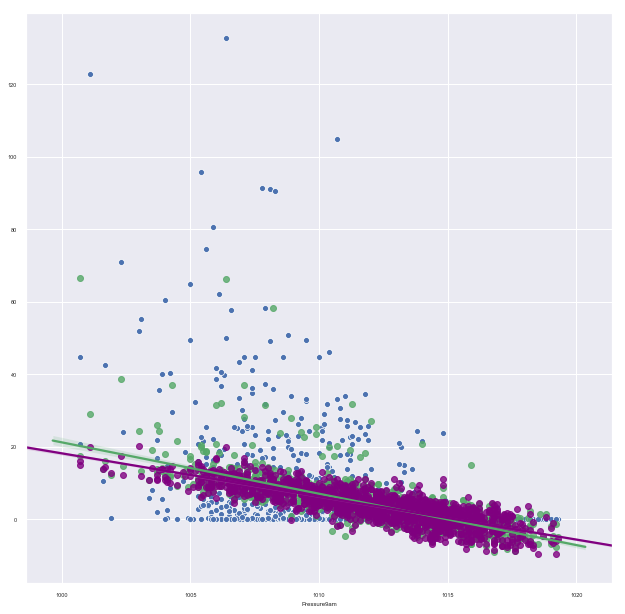

In [145]:
# Plot to compare models
sns.scatterplot(x = X_test_final['Pressure9am'], y = y_test.values.ravel())
sns.regplot(x = X_test_final['Pressure9am'], y = lr_pred.ravel(), color='g')
sns.regplot(x = X_test_final['Pressure9am'], y = ridge_pred.ravel(), color='purple')

# Lasso polynomial regression - sklearn

In [146]:
# Create polynomial regression features of nth degree
poly_reg = PolynomialFeatures(degree = 3)
X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train_final))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test_final))
poly_result = poly_reg.fit(X_train_final, y_train)

# Fit linear model now polynomial features
poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

In [147]:
# Lasso regression model with alpha = 10000 (high penalty) -- now with a lot of new variables
lasso_poly_model_10k = Lasso(alpha=10000, fit_intercept=True)
lasso_poly_model_10k.fit(X_poly_train, y_train)
lasso_poly_10k_pred = lasso_poly_model_10k.predict(X_poly_test)
print(lasso_poly_model_10k.score(X_poly_test, y_test))
lasso_poly_model_10k.coef_

0.43722520390479436


C:\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ 0., -0., -0., ...,  0.,  0.,  0.])

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


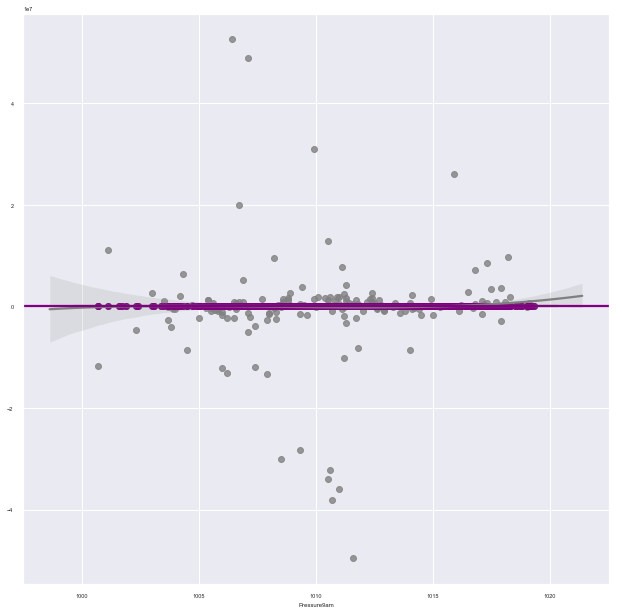

In [148]:
# Plot to compare models
sns.scatterplot(x = X_test_final['Pressure9am'], y = y_test.values.ravel())
sns.regplot(x = X_test_final['Pressure9am'], y = lr_pred.ravel(), color='g')
sns.regplot(x = X_test_final['Pressure9am'], y = y_poly_pred.ravel(), color='gray', order=3)
sns.regplot(x = X_test_final['Pressure9am'], y = lasso_poly_10k_pred.ravel(), color='purple', order=3)